# Changes in M2, Personal Consumption Expenditures (PCE), and CPI
Analysis of annual changes in M2, Personal Consumption Expenditures, and CPI. Whereever possible I make use of data series with quarterly frequencies provided by FRED. In cases where only monthly freqencies are available, I downsample to a quarter start by taking the average over the quarter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas_datareader.data as web
from datetime import date

In [2]:
report_start = date.fromisoformat('1959-01-01')
report_end = date.today()

### Get M2, PCE, and CPI data
I use the following dataseries provided by [FRED](https://fred.stlouisfed.org/):
* `M2SL`&mdash; M2, seasonally adjusted (monthly frequency)
* `PCECC96` &mdash; Real Personal Consumption Expenditures in billions of Chained 2012 Dollars, seasonally adjusted (quarterly frequency)
* `CPIAUCSL` &mdash; Consumer Price Index for All Urban Consumers, Index 1982-1984=100, seasonally adjusted (monthly frequency)

In [3]:
m2_cpi = web.get_data_fred(['M2SL', 'CPIAUCSL'], start=report_start, end=report_end)

# Downsampling to quarterly frequency to be consistent with PCE frequency
m2_cpi = m2_cpi.resample('QS').mean()

pce = web.get_data_fred('PCECC96', start=report_start, end=report_end)

m2_pce_cpi = pd.concat([m2_cpi, pce], axis=1)

# Converting to annual percentage changes
m2_pce_cpi.update(m2_pce_cpi.pct_change(4)*100)

m2_pce_cpi = m2_pce_cpi.loc['1960':]

In [4]:
m2_pce_cpi.rename(
    columns={'M2SL': 'M2 Annual Percentage Change', 'CPIAUCSL': 'Annual Seasonally Adjusted CPI',
             'PCECC96': 'PCE Annual Percentage Change'},
    inplace=True)
m2_pce_cpi

,M2 Annual Percentage Change,Annual Seasonally Adjusted CPI,PCE Annual Percentage Change
DATE,,,
1960-01-01,3.752171,1.391124,3.703429
1960-04-01,3.069375,1.824859,3.414475
1960-07-01,3.501069,1.358758,1.936194
1960-10-01,4.644380,1.395982,1.953360
1961-01-01,5.915839,1.508107,0.949765
...,...,...,...
2021-04-01,15.145846,4.813228,16.239760
2021-07-01,13.142451,5.290545,7.110500
2021-10-01,12.586596,6.721251,6.887755


### Visualizing annual changes in M2, PCE, and CPI
There's a very high negative correlation between changes in the real money supply and inflation. This is particularly pronounced during the 1960-1986 period when we saw bouts of high inflation.

In [5]:
GRAPH_TITLE = 'US Annual Percentage Changes in M2, PCE, and CPI from %s' % m2_pce_cpi.index[0].strftime('%Y')
LABEL_MEAN_M2_PCE_CPI = 'Mean Level of Annual Changes in M2, PCE, and CPI'

In [6]:
# Mean level of M2, PCE, and CPI
mean_level_m2_pce_cpi = m2_pce_cpi.mean().mean()

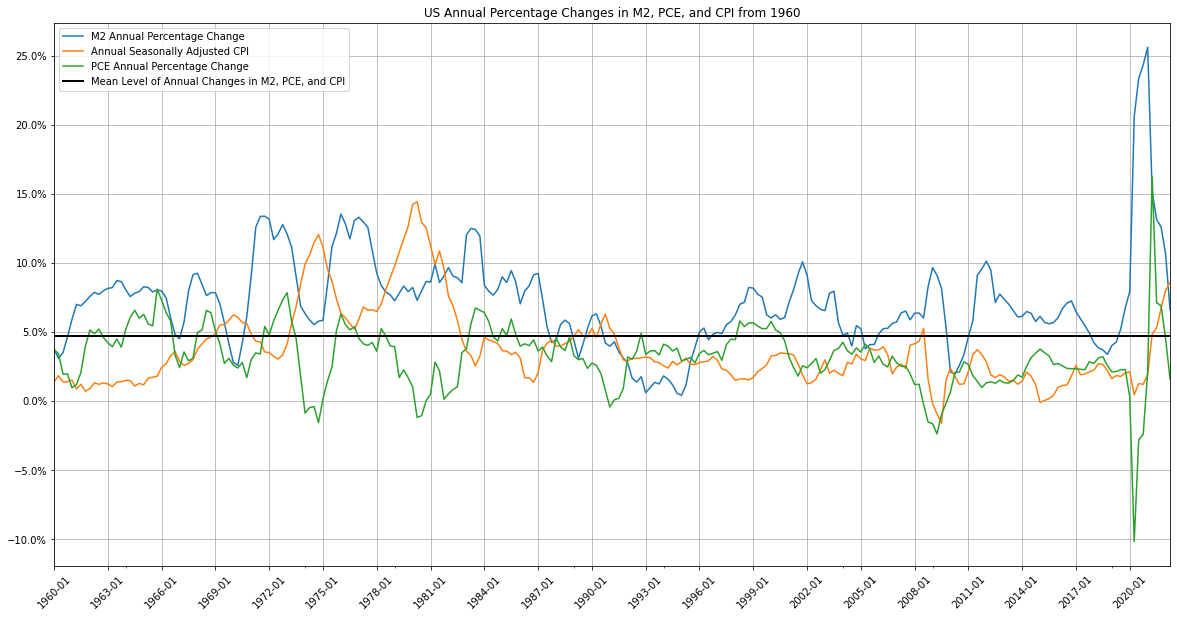

In [7]:
ax = m2_pce_cpi.plot(figsize=(20,10), grid=True, title=GRAPH_TITLE,
                     xticks=m2_pce_cpi.index[::12], xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=mean_level_m2_pce_cpi, lw=2, c='k', label=LABEL_MEAN_M2_PCE_CPI)
ax.legend()
_ = ax.set_xticklabels(list(map(lambda x: x.strftime('%Y-%m'), m2_pce_cpi.index[::12])))

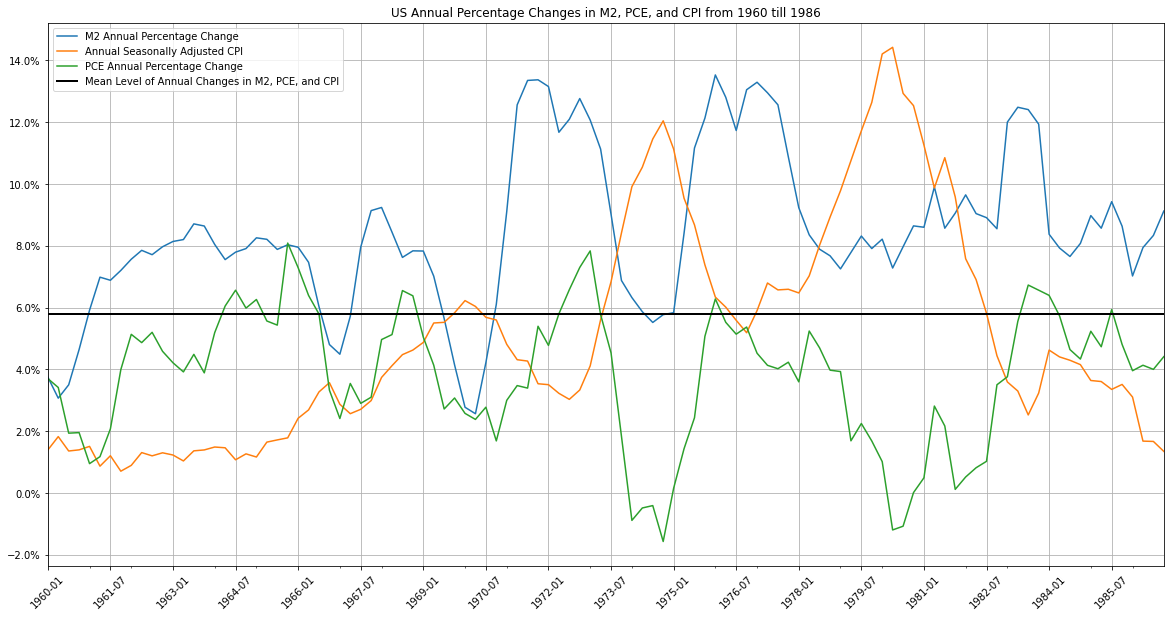

In [8]:
m2_pce_cpi_85 = m2_pce_cpi.loc[:'1986']
mean_level_m2_pce_cpi_85 = m2_pce_cpi_85.mean().mean()
ax = m2_pce_cpi_85.plot(figsize=(20,10), grid=True,
                        title=GRAPH_TITLE + ' till ' + m2_pce_cpi_85.index[-1].strftime('%Y'),
                        xticks=m2_pce_cpi_85.index[::6], xlabel='', rot=45)#, yticks=np.arange(0, 20, 2.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=mean_level_m2_pce_cpi_85, lw=2, c='k', label=LABEL_MEAN_M2_PCE_CPI)
ax.legend()
_ = ax.set_xticklabels(list(map(lambda x: x.strftime('%Y-%m'), m2_pce_cpi_85.index[::6])))

### Correlations
* **CPI and PCE**: Increases in inflation correlate strongly with a reduction in personal consumption, the correlation is yet stronger with a PCE lag of a quarter. Inflation leads to a reduction in consumption.
* **M2 and PCE**: Moderate positive correlation, it gets a little stronger with a PCE lag of a quarter. Increaes in the broad money supply lead to increases in personal consumption, albeit not so strongly as the errosion of personal consumption by increases in inflation.
* **M2 and CPI**: No immediate sizable correlation, however it becomes noticable after 2 years &mdash; i.e. M2 changes in a given quarter correlate positively with CPI in about 2 years later. The initiation of a more conservative monetary policy has appreciable effect on reducing inflation over a 2 year horizon.

In [9]:
m2_pce_cpi_85.corr()

,M2 Annual Percentage Change,Annual Seasonally Adjusted CPI,PCE Annual Percentage Change
M2 Annual Percentage Change,1.000000,0.006468,0.398805
Annual Seasonally Adjusted CPI,0.006468,1.000000,-0.625816
PCE Annual Percentage Change,0.398805,-0.625816,1.000000


Shifting PCE by a quarter ahead shows that its negative correlation with CPI increases further and so does its positive correlation with changes in the broad money supply:

In [10]:
pce = m2_pce_cpi_85.loc[:, 'PCE Annual Percentage Change']
m2_pce_cpi_85.iloc[:, :2].corrwith(pce.shift(-1))

M2 Annual Percentage Change       0.465301
Annual Seasonally Adjusted CPI   -0.656020
dtype: float64

Shifting CPI changes 2-3 years ahead shows a sizable effect of a stricter monetary policy on reducig inflation in about 2 years' time

In [11]:
cpi = m2_pce_cpi_85.loc[:, 'Annual Seasonally Adjusted CPI']
m2 = m2_pce_cpi_85.iloc[:, 0]
m2.corr(cpi.shift(-11))

0.5481735154197258

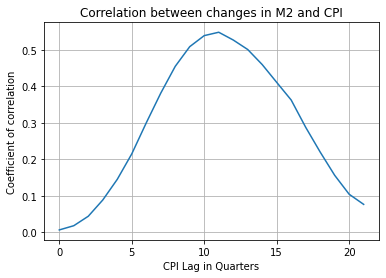

In [12]:
idx = pd.Index(range(22), name='CPI Lag in Quarters')
effect_of_M2_shrinking = pd.Series(idx.map(lambda lag: m2.corr(cpi.shift(-lag))), index=idx,
                                   name='Correlation between changes in M2 and CPI')
_ = effect_of_M2_shrinking.plot(grid=True, title='Correlation between changes in M2 and CPI',
                                ylabel='Coefficient of correlation')

Zomming in on the last 5 years. Will the history repeat itsel &mdash; i.e. the reduction in broad money supply that started a year ago leading to a reduction in inflation in 2023?

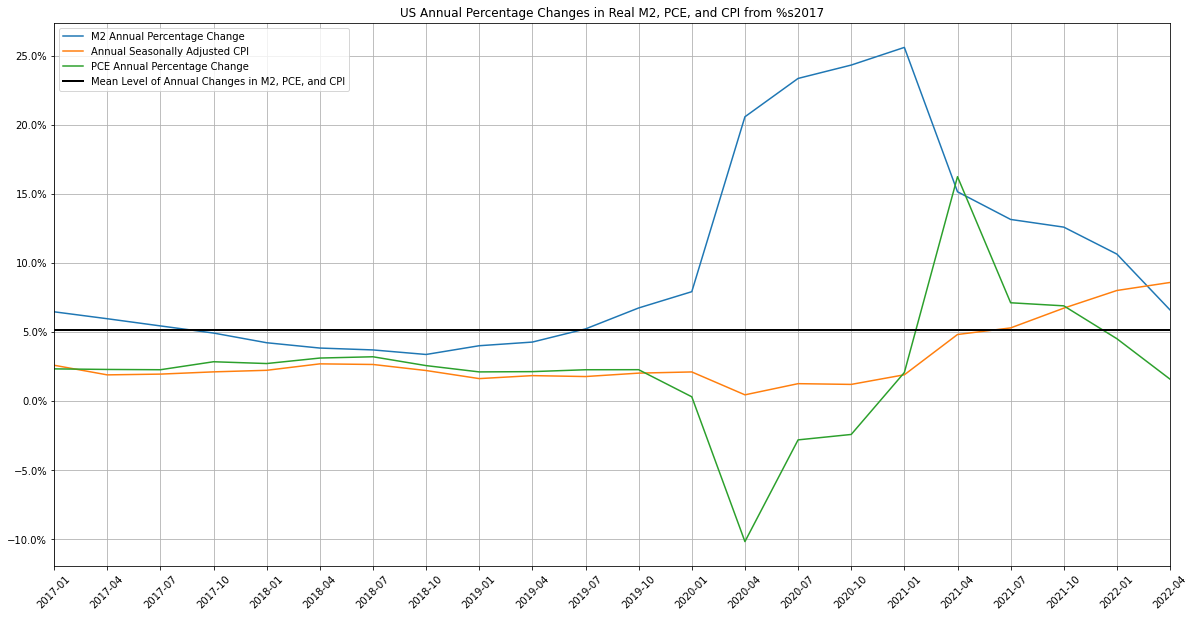

In [13]:
m2_pce_cpi_2017 = m2_pce_cpi.loc['2017':]
mean_level_m2_pce_cpi_2017 = m2_pce_cpi_2017.mean().mean()
ax = m2_pce_cpi_2017.plot(figsize=(20,10), grid=True,
                          title='US Annual Percentage Changes in Real M2, PCE, and CPI from %s' + m2_pce_cpi_2017.index[0].strftime('%Y'),
                          xticks=m2_pce_cpi_2017.index[::], xlabel='', rot=45)#, yticks=np.arange(0, 20, 2.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=mean_level_m2_pce_cpi_2017, lw=2, c='k', label=LABEL_MEAN_M2_PCE_CPI)
ax.legend()
_ = ax.set_xticklabels(list(map(lambda x: x.strftime('%Y-%m'), m2_pce_cpi_2017.index[::])))